In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## **加载数据**

**1. 加载蛋白质训练以及测试数据**

In [52]:
proteins = pd.read_csv("./train_proteins.csv")
print('proteins shape: ',proteins.shape)
proteins.head()

proteins shape:  (232741, 5)


,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0


In [6]:
proteins_test = pd.read_csv('./example_test_files/test_proteins.csv')
print('proteins_test shape: ',proteins_test.shape)
proteins_test.head()

proteins_test shape:  (453, 6)


,visit_id,visit_month,patient_id,UniProt,NPX,group_key
0,50423_0,0,50423,O00391,33127.90,0
1,50423_0,0,50423,O00533,490742.00,0
2,50423_0,0,50423,O00584,43615.30,0
3,50423_0,0,50423,O14773,16486.60,0
4,50423_0,0,50423,O14791,2882.42,0


**2. 加载肽训练以及测试数据**

In [7]:
peptides = pd.read_csv('./train_peptides.csv')
print('peptides shape: ',peptides.shape)
peptides.head()

peptides shape:  (981834, 6)


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


In [8]:
peptides_test = pd.read_csv('./example_test_files/test_peptides.csv')
print('peptides_test shape: ',peptides_test.shape)
peptides_test.head()

peptides_test shape:  (2057, 7)


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,group_key
0,50423_0,0,50423,O00391,AHFSPSNIILDFPAAGSAAR,22226.3,0
1,50423_0,0,50423,O00391,NEQEQPLGQWHLS,10901.6,0
2,50423_0,0,50423,O00533,GNPEPTFSWTK,51499.4,0
3,50423_0,0,50423,O00533,IEIPSSVQQVPTIIK,125492.0,0
4,50423_0,0,50423,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,23174.2,0


**3. 加载临床训练测试数据**

In [9]:
train_clinical = pd.read_csv('./train_clinical_data.csv')
supplemental_clinical = pd.read_csv('./supplemental_clinical_data.csv')
print('train_clinical shape: ',train_clinical.shape)
train_clinical.head()
print('supplemental_clinical shape: ',supplemental_clinical.shape)
supplemental_clinical.head()

train_clinical shape:  (2615, 8)
supplemental_clinical shape:  (2223, 8)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN


In [10]:
test = pd.read_csv('./example_test_files/test.csv')
print('test shape: ',test.shape)
test.head()

test shape:  (16, 6)


,visit_id,visit_month,patient_id,updrs_test,row_id,group_key
0,3342_0,0,3342,updrs_1,3342_0_updrs_1,0
1,3342_0,0,3342,updrs_2,3342_0_updrs_2,0
2,3342_0,0,3342,updrs_3,3342_0_updrs_3,0
3,3342_0,0,3342,updrs_4,3342_0_updrs_4,0
4,50423_0,0,50423,updrs_1,50423_0_updrs_1,0


**分析数据**

In [11]:
#分别计算蛋白质和病人的不重复数量以及总数
proteins.groupby('visit_id').agg({'UniProt':['nunique','count'],'patient_id':['nunique','count'],'NPX':['min','max','mean','std']}).reset_index()

visit_id UniProt       patient_id             NPX               \
               nunique count    nunique count       min          max   
0      10053_0     165   165          1   165  2497.840  269126000.0   
1     10053_12     171   171          1   171  5800.870  270030000.0   
2     10053_18     208   208          1   208  1334.110  278835000.0   
3     10138_12     217   217          1   217  2520.240  365582000.0   
4     10138_24     219   219          1   219  1436.940  396894000.0   
...        ...     ...   ...        ...   ...       ...          ...   
1108   8699_24     216   216          1   216   756.551  346067000.0   
1109    942_12     212   212          1   212  1722.770  330558000.0   
1110    942_24     217   217          1   217  1339.150  336769000.0   
1111    942_48     216   216          1   216  1272.480  358059000.0   
1112     942_6     216   216          1   216  2491.690  290111000.0   

                                  
              mean           std  
0     2.856580e+06  2.131630e+07  
1     2.728871e+06  2.092162e+07  
2     2.509967e+06  1.969453e+07  
3     3.002583e+06  2.516170e+07  
4     3.068891e+06  2.716806e+07  
...            ...           ...  
1108  3.064059e+06  2.409420e+07  
1109  2.613298e+06  2.295228e+07  
1110  2.616142e+06  2.312662e+07  
1111  2.768442e+06  2.460543e+07  
1112  2.476880e+06  2.002174e+07  

[1113 rows x 9 columns]

In [10]:
#分别计算蛋白质和肽的不重复数和数量
peptides.groupby('visit_id').agg({'UniProt':['nunique','count'],'patient_id':['nunique','count'],'Peptide':['nunique','count'],'PeptideAbundance': ['min','max','mean','std']}).reset_index()

visit_id UniProt       patient_id       Peptide       PeptideAbundance  \
               nunique count    nunique count nunique count              min   
0      10053_0     165   649          1   649     649   649          82.9679   
1     10053_12     171   633          1   633     633   633         128.4460   
2     10053_18     208   868          1   868     868   868         108.5000   
3     10138_12     217   932          1   932     932   932         129.0240   
4     10138_24     219   918          1   918     918   918         142.6480   
...        ...     ...   ...        ...   ...     ...   ...              ...   
1108   8699_24     216   911          1   911     911   911         106.9420   
1109    942_12     212   889          1   889     889   889          88.3277   
1110    942_24     217   910          1   910     910   910         108.7050   
1111    942_48     216   907          1   907     907   907         148.1360   
1112     942_6     216   918          1   918     918   918         158.8690   

                                                
              max           mean           std  
0      66333900.0  726248.393431  3.535602e+06  
1      73059300.0  737183.385744  3.799654e+06  
2      64711200.0  601466.784320  3.006568e+06  
3      71652400.0  699099.199189  3.379573e+06  
4     123897000.0  732120.888877  4.912602e+06  
...           ...            ...           ...  
1108   99846400.0  726494.824901  4.080307e+06  
1109   70888500.0  623193.979635  3.362987e+06  
1110   71995500.0  623849.652027  3.294163e+06  
1111   70658500.0  659297.802601  3.359265e+06  
1112   58472500.0  582795.558517  2.734257e+06  

[1113 rows x 11 columns]

## 数据统计

### 临床数据统计
1. 首先统计临床数据两个数据集的规模 发现两个数据集中的病人其实是没有交集的

In [20]:
# 临床数据统计
print("train_clinical: Found {:,d} unique patient_id values".format(train_clinical["patient_id"].nunique()))
print("train_clinical: Found {:,d} unique visit_month values".format(train_clinical["visit_month"].nunique()))

print("supplemental_clinical: Found {:,d} unique patient_id values".format(supplemental_clinical["patient_id"].nunique()))
print("supplemental_clinical: Found {:,d} unique visit_month values".format(supplemental_clinical["visit_month"].nunique()))
# 合并两个临床数据
combined = pd.concat([train_clinical, supplemental_clinical]).reset_index(drop=True)
print("combined: Found {:,d} unique patient_id values".format(combined["patient_id"].nunique()))
print("combined: Found {:,d} unique visit_month values".format(combined["visit_month"].nunique()))

train_clinical: Found 248 unique patient_id values
train_clinical: Found 17 unique visit_month values
supplemental_clinical: Found 771 unique patient_id values
supplemental_clinical: Found 8 unique visit_month values
combined: Found 1,019 unique patient_id values
combined: Found 18 unique visit_month values


2. 查看数据集中的空值情况

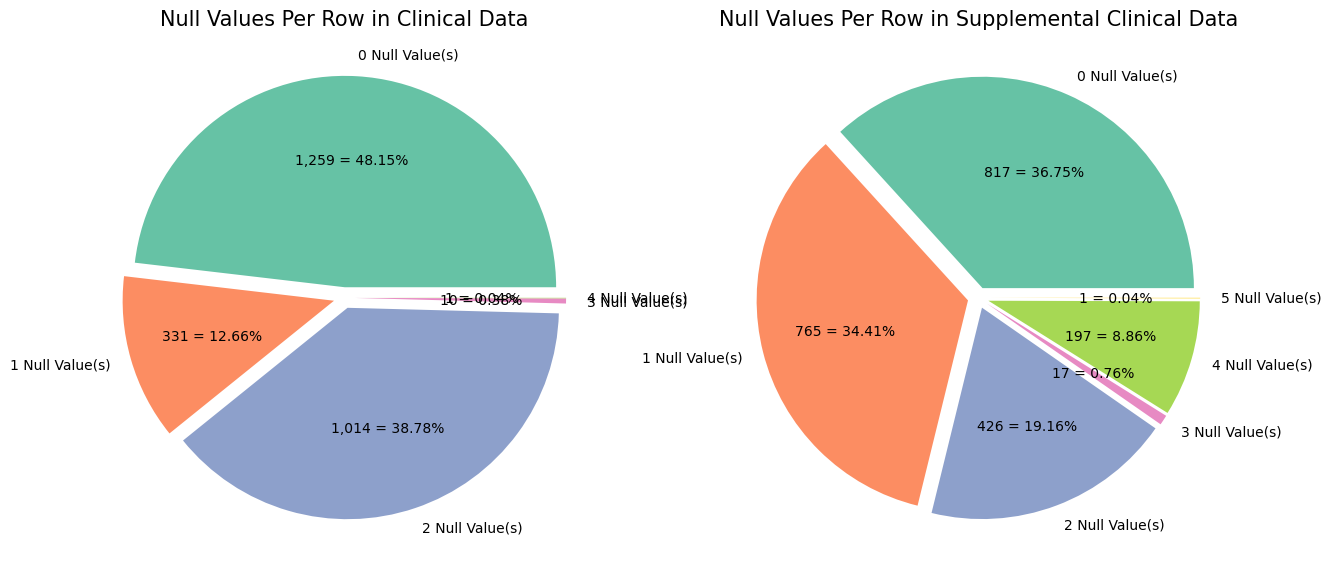

In [27]:
train_clinical["null_count"] = train_clinical.isnull().sum(axis=1)
counts_train_clinical = train_clinical.groupby("null_count")["visit_id"].count().to_dict()
null_train_clinical = {"{} Null Value(s)".format(k) : v for k, v in counts_train_clinical.items()}

supplemental_clinical["null_count"] = supplemental_clinical.isnull().sum(axis=1)
counts_supplemental_clinical = supplemental_clinical.groupby("null_count")["visit_id"].count().to_dict()
null_supplemental_clinical = {"{} Null Value(s)".format(k) : v for k, v in counts_supplemental_clinical.items()}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

axs = axs.flatten()

_ = axs[0].pie(
    x=list(null_train_clinical.values()), 
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_train_clinical.values())/100, x),
    explode=[0.05] * len(null_train_clinical.keys()), 
    labels=null_train_clinical.keys(), 
    colors=sns.color_palette("Set2")[0:len(null_train_clinical.keys())],
)
_ = axs[0].set_title("Null Values Per Row in Clinical Data", fontsize=15)


_ = axs[1].pie(
    x=list(null_supplemental_clinical.values()), 
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_supplemental_clinical.values())/100, x),
    explode=[0.05] * len(null_supplemental_clinical.keys()), 
    labels=null_supplemental_clinical.keys(), 
    colors=sns.color_palette("Set2")[0:len(null_supplemental_clinical.keys())],
)
_ = axs[1].set_title("Null Values Per Row in Supplemental Clinical Data", fontsize=15)

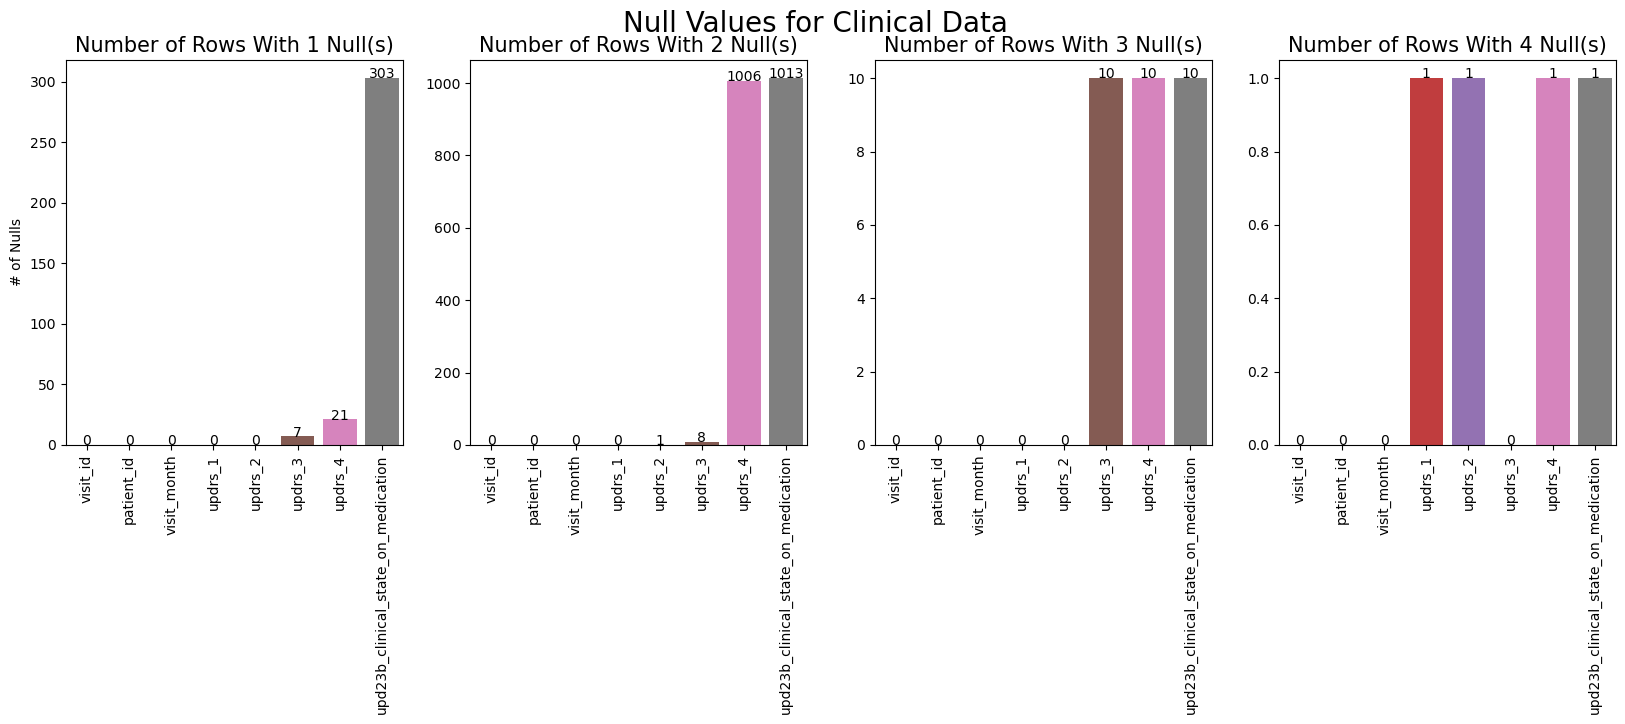

In [28]:
null_count_labels = [train_clinical[(train_clinical["null_count"] == x)].isnull().sum().index[:-1] for x in range(1, 6)]
null_count_values = [train_clinical[(train_clinical["null_count"] == x)].isnull().sum().values[:-1] for x in range(1, 6)]

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle("Null Values for Clinical Data", fontsize=20)

axs = axs.flatten()

for x in range(0, 4):
    ax = axs[x]
    labels = null_count_labels[x]
    _ = sns.barplot(x=labels, y=null_count_values[x], ax=ax)
    _ = ax.set_title("Number of Rows With {} Null(s)".format(x + 1), fontsize=15)
    _ = ax.set_ylabel("# of Nulls" if x == 0 else "")
    _ = ax.set_xlabel("")
    _ = ax.set_xticks([z for z in range(len(labels))], labels, rotation=90)
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:d}".format(int(height)), ha="center")

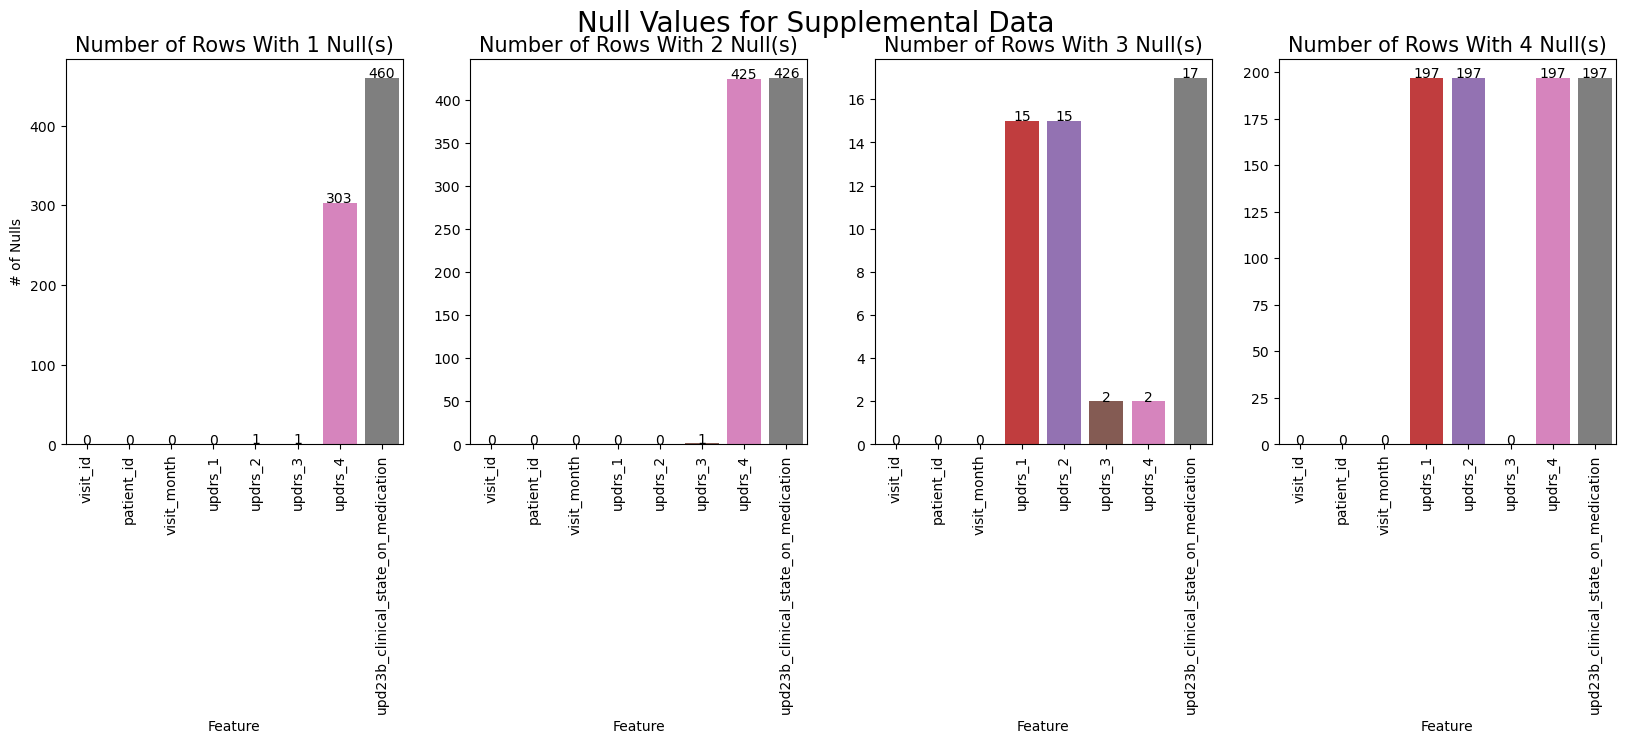

In [29]:
null_count_labels = [supplemental_clinical[(supplemental_clinical["null_count"] == x)].isnull().sum().index[:-1] for x in range(1, 6)]
null_count_values = [supplemental_clinical[(supplemental_clinical["null_count"] == x)].isnull().sum().values[:-1] for x in range(1, 6)]

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle("Null Values for Supplemental Data", fontsize=20)

axs = axs.flatten()

for x in range(0, 4):
    ax = axs[x]
    labels = null_count_labels[x]
    _ = sns.barplot(x=labels, y=null_count_values[x], ax=ax)
    _ = ax.set_title("Number of Rows With {} Null(s)".format(x + 1), fontsize=15)
    _ = ax.set_ylabel("# of Nulls" if x == 0 else "")
    _ = ax.set_xlabel("Feature")
    _ = ax.set_xticks([z for z in range(len(labels))], labels, rotation=90)
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:d}".format(int(height)), ha="center")

### train_clinical 和 supplemental_clinical 数据集差别

In [30]:
features = [
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
]

train_clinical[features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
visit_month,2615.000000,31.190822,25.199053,0.000000,10.500000,24.000000,48.000000,108.000000
updrs_1,2614.000000,7.110559,5.525955,0.000000,3.000000,6.000000,10.000000,33.000000
updrs_2,2613.000000,6.743590,6.323230,0.000000,1.000000,5.000000,10.000000,40.000000
updrs_3,2590.000000,19.421236,15.000289,0.000000,6.000000,19.000000,29.000000,86.000000
updrs_4,1577.000000,1.861763,3.022112,0.000000,0.000000,0.000000,3.000000,20.000000


In [31]:
features = [
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
]

supplemental_clinical[features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
visit_month,2223.000000,12.910481,13.060532,0.000000,0.000000,6.000000,24.000000,36.000000
updrs_1,2010.000000,5.684080,4.366964,0.000000,2.000000,5.000000,8.000000,27.000000
updrs_2,2009.000000,6.507715,4.968132,0.000000,2.000000,5.000000,10.000000,34.000000
updrs_3,2218.000000,22.917944,12.342596,0.000000,14.000000,22.000000,31.000000,72.000000
updrs_4,1295.000000,0.840154,1.860247,0.000000,0.000000,0.000000,0.000000,12.000000


Supplemental Clinical Months:
[0, 36, 5, 6, 12, 18, 24, 30]

Train Clinical Months:
[0, 96, 3, 36, 6, 72, 9, 42, 12, 108, 48, 18, 84, 54, 24, 60, 30]
patient_id
55                        [0, 3, 6, 9, 12, 18, 24, 30, 36, 42, 48, 54, 60]
942              [0, 3, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 72, 84, 96]
1517                                [0, 6, 12, 18, 24, 30, 36, 42, 48, 60]
1923                                            [0, 6, 12, 18, 24, 30, 36]
2660                                               [0, 12, 24, 36, 48, 60]
3636                  [0, 3, 6, 9, 12, 18, 24, 30, 36, 42, 48, 54, 60, 72]
3863                                    [0, 6, 12, 18, 24, 30, 36, 42, 48]
4161                          [0, 3, 6, 9, 12, 18, 24, 30, 36, 42, 48, 54]
4172                                       [0, 12, 24, 36, 48, 60, 84, 96]
4923                            [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60]
5027                                          [0, 12, 24, 48, 60, 84, 108]
5036          

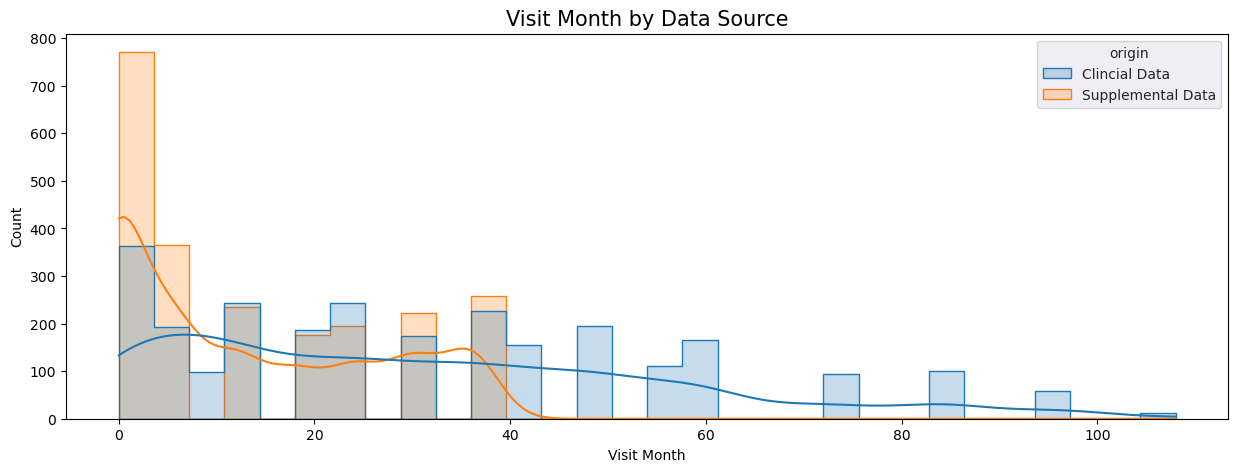

In [23]:
# 提取 supplemental_clinical 中的 visit_month 列，并将其转换为列表
supplemental_clinical_months = list(set(supplemental_clinical['visit_month']))

# 提取 train_clinical 中的 visit_month 列，并将其转换为列表
train_clinical_months = list(set(train_clinical['visit_month']))

# 显示结果
print("Supplemental Clinical Months:")
print(supplemental_clinical_months)
print("\nTrain Clinical Months:")
print(train_clinical_months)

# 使用 groupby 函数按 patient_id 分组，并使用 unique 函数获取每个病人访问过的月份列表
patient_visits = train_clinical.groupby('patient_id')['visit_month'].unique()

# 显示结果
print(patient_visits)

# 使用 groupby 函数按 patient_id 分组，并使用 unique 函数获取每个病人访问过的月份列表
patient_visits = supplemental_clinical.groupby('patient_id')['visit_month'].unique()

# 显示结果
print(patient_visits)

train_clinical["origin"] = "Clincial Data"
supplemental_clinical["origin"] = "Supplemental Data"

combined = pd.concat([train_clinical, supplemental_clinical]).reset_index(drop=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.histplot(data=combined, x="visit_month", hue="origin", kde=True, ax=ax, element="step")
_ = ax.set_title("Visit Month by Data Source", fontsize=15)
_ = ax.set_ylabel("Count")
_ = ax.set_xlabel("Visit Month")

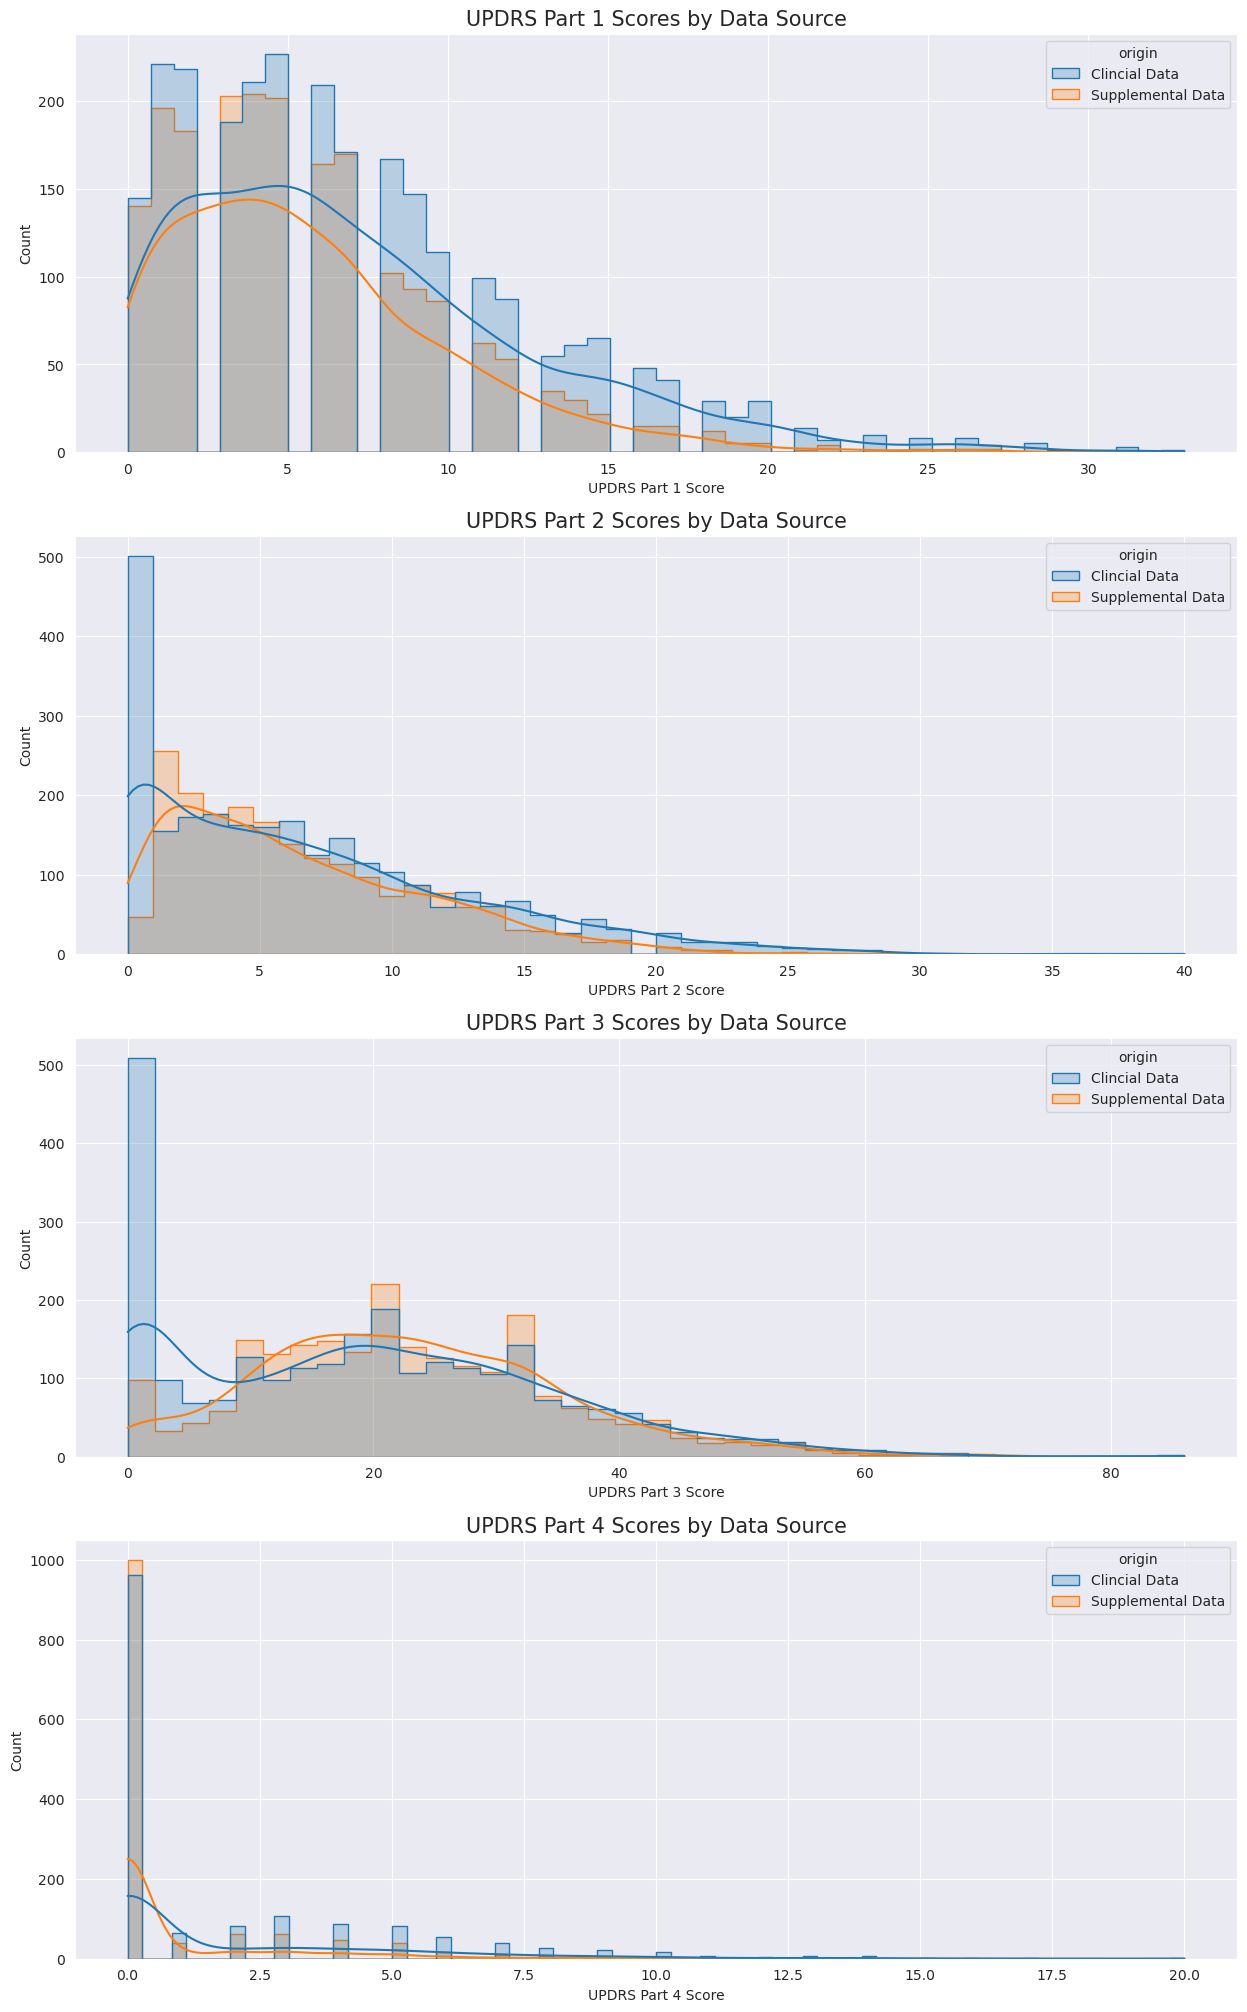

In [33]:
train_clinical["origin"] = "Clincial Data"
supplemental_clinical["origin"] = "Supplemental Data"

combined = pd.concat([train_clinical, supplemental_clinical]).reset_index(drop=True)

features = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
labels = ["UPDRS Part 1", "UPDRS Part 2", "UPDRS Part 3", "UPDRS Part 4"]

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()

sns.set_style('darkgrid')

for x, feature in enumerate(features):
    ax = axs[x]
    _ = sns.histplot(data=combined, x=feature, hue="origin", kde=True, ax=ax, element="step")
    _ = ax.set_title("{} Scores by Data Source".format(labels[x]), fontsize=15)
    _ = ax.set_ylabel("Count")
    _ = ax.set_xlabel("{} Score".format(labels[x]))

### 蛋白质和肽的数据分析

In [40]:
proteins.groupby('UniProt').agg({'UniProt':['nunique','count']}).reset_index()

UniProt              
            nunique count
0    O00391       1   764
1    O00533       1  1112
2    O00584       1  1100
3    O14498       1  1032
4    O14773       1  1047
..      ...     ...   ...
222  Q9UHG2       1  1113
223  Q9UKV8       1   907
224  Q9UNU6       1   761
225  Q9Y646       1  1052
226  Q9Y6R7       1  1044

[227 rows x 3 columns]

In [42]:
peptides.groupby('Peptide').agg({'Peptide':['nunique','count']}).reset_index()

Peptide              
                                                      nunique count
0                                       AADDTWEPFASGK       1  1069
1    AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K       1  1049
2                    AAFTEC(UniMod_4)C(UniMod_4)QAADK       1  1107
3                                         AANEVSSADVK       1   909
4                             AATGEC(UniMod_4)TATVGKR       1   914
..                                                ...     ...   ...
963                                    YVNKEIQNAVNGVK       1  1111
964                                        YWGVASFLQK       1  1089
965                             YYC(UniMod_4)FQGNQFLR       1  1105
966                                         YYTYLIMNK       1  1030
967                                     YYWGGQYTWDMAK       1   865

[968 rows x 3 columns]

In [58]:
proteins_55 = proteins[proteins['patient_id']== 55]
groups = proteins_55.groupby(['patient_id', 'visit_id']).agg({'UniProt':['nunique','count']})
groups

UniProt      
                    nunique count
patient_id visit_id              
55         55_0         219   219
           55_12        222   222
           55_36        224   224
           55_6         218   218

In [15]:
# 判断train_clinical和supplemental_clinical合并后的visit_id是否在proteins和peptides中都存在
merged_df = pd.concat([train_clinical, supplemental_clinical])
is_in_proteins = merged_df['visit_id'].isin(proteins['visit_id']).all()
is_in_peptides = merged_df['visit_id'].isin(peptides['visit_id']).all()

print(is_in_proteins)
print(is_in_peptides)
if is_in_proteins and is_in_peptides:
    print("train_clinical和supplemental_clinical合并后的visit_id在proteins和peptides中都存在")
else:
    print("train_clinical和supplemental_clinical合并后的visit_id在proteins和peptides中并不完全存在")

False
False
train_clinical和supplemental_clinical合并后的visit_id在proteins和peptides中并不完全存在


In [32]:
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', 100)
# 按 visit_id 分组，并统计每个组中出现的不同的蛋白质列表
protein_list = proteins.groupby('visit_id').agg({'UniProt': lambda x: x.unique().tolist()})

# 打印结果
print(protein_list)

                                                                                                       UniProt
visit_id                                                                                                      
10053_0    [O00391, O00533, O14773, O14791, O15240, O15394, O43505, O60888, O75144, O94919, P00450, P00734,...
10053_12   [O00391, O00533, O15240, O15394, O43505, O60888, O75144, O94919, P00450, P00734, P00738, P00746,...
10053_18   [O00391, O00533, O00584, O14498, O14791, O15240, O15394, O43505, O60888, O75144, O94919, P00441,...
10138_12   [O00391, O00533, O00584, O14498, O14773, O14791, O15240, O15394, O43505, O60888, O75144, O75326,...
10138_24   [O00391, O00533, O00584, O14498, O14773, O14791, O15240, O15394, O43505, O60888, O75144, O75326,...
10138_36   [O00391, O00533, O00584, O14498, O14773, O14791, O15240, O15394, O43505, O60888, O75144, O75326,...
10174_0    [O00391, O00533, O00584, O14498, O14773, O14791, O15240, O15394, O43505, O60888, O75144, O75326,...
1

In [34]:
proteins_in_peptides = proteins['UniProt'].isin(peptides['UniProt']).all()
proteins_in_peptides

True

In [47]:
# 按照 UniProt 列进行分组，统计每组中的 Peptide 列的数量和名称
peptide_counts = peptides.groupby('UniProt').agg({'Peptide': ['nunique', lambda x: ', '.join(set(x))]})

# 重命名列名
peptide_counts.columns = ['Peptide_Count', 'Peptide_Names']

# 将索引列 UniProt 转换为普通列
peptide_counts = peptide_counts.reset_index()
peptide_counts

,UniProt,Peptide_Count,Peptide_Names
0,O00391,1,NEQEQPLGQWHLS
1,O00533,8,"TLKIENVSYQDKGNYR, KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK, VMTPAVYAPYDVK, VIAVNEVGR, IEIPSSVQQVPT..."
2,O00584,2,"HGTC(UniMod_4)AAQVDALNSQKK, ELDLNSVLLK"
3,O14498,1,ALPGTPVASSQPR
4,O14773,2,"LFGGNFAHQASVAR, LYQQHGAGLFDVTR"
5,O14791,1,VTEPISAESGEQVER
6,O15240,3,"THLGEALAPLSK, AYQGVAAPFPK, QQETAAAETETR"
7,O15394,2,"NIINSDGGPYVC(UniMod_4)R, ASGSPEPAISWFR"
8,O43505,1,TALASGGVLDASGDYR
9,O60888,1,TQSSLVPALTDFVR


### 55号病人的数据

In [48]:
train_clinical_55 = train_clinical[train_clinical['patient_id'] == 55]
train_clinical_55

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,origin
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,Clincial Data
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN,Clincial Data
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN,Clincial Data
3,55_9,55,9,8.0,9.0,30.0,0.0,On,Clincial Data
4,55_12,55,12,10.0,10.0,41.0,0.0,On,Clincial Data
5,55_18,55,18,7.0,13.0,38.0,0.0,On,Clincial Data
6,55_24,55,24,16.0,9.0,49.0,0.0,On,Clincial Data
7,55_30,55,30,14.0,13.0,49.0,0.0,On,Clincial Data
8,55_36,55,36,17.0,18.0,51.0,0.0,On,Clincial Data
9,55_42,55,42,12.0,20.0,41.0,0.0,On,Clincial Data


In [50]:
supplemental_clinical_55 = supplemental_clinical[supplemental_clinical['patient_id'] == 55]
supplemental_clinical_55

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,origin


In [53]:
proteins_55 = proteins[proteins['patient_id'] == 55]
proteins_55

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,1.125430e+04
1,55_0,0,55,O00533,7.324300e+05
2,55_0,0,55,O00584,3.958580e+04
3,55_0,0,55,O14498,4.152690e+04
4,55_0,0,55,O14773,3.123800e+04
5,55_0,0,55,O14791,4.202710e+03
6,55_0,0,55,O15240,1.777750e+05
7,55_0,0,55,O15394,6.289820e+04
8,55_0,0,55,O43505,3.333760e+05
9,55_0,0,55,O60888,1.668500e+05


In [54]:
peptides_55 = peptides[peptides['patient_id'] == 55]
peptides_55

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
5,55_0,0,55,O00533,TLKIENVSYQDKGNYR,23216.50
6,55_0,0,55,O00533,VIAVNEVGR,170878.00
7,55_0,0,55,O00533,VMTPAVYAPYDVK,148771.00
8,55_0,0,55,O00533,VNGSPVDNHPFAGDVVFPR,55202.10
9,55_0,0,55,O00584,ELDLNSVLLK,27229.30


In [58]:
submission = pd.read_csv("./example_test_files/sample_submission.csv")
print('submission shape: ',submission.shape)
submission_3342 = submission[submission['prediction_id'].str.startswith('3342_')]
submission_3342

submission shape:  (64, 3)


,prediction_id,rating,group_key
0,3342_0_updrs_1_plus_0_months,0,0
1,3342_0_updrs_1_plus_6_months,0,0
2,3342_0_updrs_1_plus_12_months,0,0
3,3342_0_updrs_1_plus_24_months,0,0
4,3342_0_updrs_2_plus_0_months,0,0
5,3342_0_updrs_2_plus_6_months,0,0
6,3342_0_updrs_2_plus_12_months,0,0
7,3342_0_updrs_2_plus_24_months,0,0
8,3342_0_updrs_3_plus_0_months,0,0
9,3342_0_updrs_3_plus_6_months,0,0


In [60]:
example_test_clinical = pd.read_csv('./example_test_files/test.csv')
example_test_clinical_3342 = example_test_clinical[example_test_clinical['patient_id'] == 3342]
example_test_clinical_3342

,visit_id,visit_month,patient_id,updrs_test,row_id,group_key
0,3342_0,0,3342,updrs_1,3342_0_updrs_1,0
1,3342_0,0,3342,updrs_2,3342_0_updrs_2,0
2,3342_0,0,3342,updrs_3,3342_0_updrs_3,0
3,3342_0,0,3342,updrs_4,3342_0_updrs_4,0
8,3342_6,6,3342,updrs_1,3342_6_updrs_1,6
9,3342_6,6,3342,updrs_2,3342_6_updrs_2,6
10,3342_6,6,3342,updrs_3,3342_6_updrs_3,6
11,3342_6,6,3342,updrs_4,3342_6_updrs_4,6
